60.00000000000151


c:\Users\Acer\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


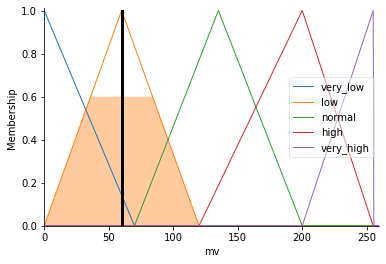

In [18]:
import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 

#DC motor control. 
sp = ctrl.Antecedent(np.arange(17, 29, 0.2), 'sp')
cv = ctrl.Antecedent(np.arange(0, 41, 0.2), 'cv')
mv = ctrl.Consequent(np.arange(0, 260, 0.5), 'mv')

# range: 18 - 27
sp['very_low'] = fuzz.trimf(sp.universe, [18,18,20])
sp['low'] = fuzz.trimf(sp.universe, [18,20,22])
sp['normal'] = fuzz.trimf(sp.universe, [20,22,24])
sp['high'] = fuzz.trimf(sp.universe, [22,24,27])
sp['very_high'] = fuzz.trimf(sp.universe, [24,27,27])

#range: 0 - 40
cv['very_low'] = fuzz.trimf(cv.universe, [0,0,10])
cv['low'] = fuzz.trimf(cv.universe, [0,10,15])
cv['normal'] = fuzz.trimf(cv.universe, [10,15,25])
cv['high'] = fuzz.trimf(cv.universe, [15,25,40])
cv['very_high'] = fuzz.trimf(cv.universe, [25,40,40])

#range: 0 - 60 Hz
# mv['very_low'] = fuzz.trimf(mv.universe, [0,0,10])
# mv['low'] = fuzz.trimf(mv.universe, [0,10,20])
# mv['normal'] = fuzz.trimf(mv.universe, [10,20,40])
# mv['high'] = fuzz.trimf(mv.universe, [20,40,60])
# mv['very_high'] =  fuzz.trimf(mv.universe, [40,60,60])

# OR range: 0 - 255 (pwm)
mv['very_low'] = fuzz.trimf(mv.universe, [0,0,70])
mv['low'] = fuzz.trimf(mv.universe, [0,60,120])
mv['normal'] = fuzz.trimf(mv.universe, [70,135,200])
mv['high'] = fuzz.trimf(mv.universe, [120,200,255])
mv['very_high'] =  fuzz.trimf(mv.universe, [200,255,255])

# sp.view()
# cv.view()

#Rule
rule1 = ctrl.Rule(sp['very_low']&cv['very_low']
                    | sp['very_low']&cv['low']
                    | sp['low']&cv['very_low'] ,mv['very_low'])

rule2 = ctrl.Rule(sp['low']&cv['normal']
                    | sp['very_low']&cv['normal']
                    | sp['low']&cv['low'] 
                    | sp['normal']&cv['low']
                    | sp['normal']&cv['very_low'],mv['low'])

rule3 = ctrl.Rule(sp['very_low']&cv['high']
                    | sp['low']&cv['high']
                    | sp['normal']&cv['normal'] 
                    | sp['high']&cv['low']
                    | sp['high']&cv['very_low'] ,mv['normal'])

rule4 = ctrl.Rule(sp['very_high']&cv['very_low']
                    | sp['very_high']&cv['low']
                    | sp['very_high']&cv['normal']
                    | sp['high']&cv['normal'] 
                    | sp['normal']&cv['high']
                    | sp['low']&cv['very_high']
                    | sp['normal']&cv['very_high'] 
                    | sp['very_low']&cv['very_high'] ,mv['high'])

rule5 = ctrl.Rule(sp['high']&cv['high'] 
                    | sp['very_high']&cv['high']
                    | sp['high']&cv['very_high'] 
                    | sp['very_high']&cv['very_high'],mv['very_high'])


mv_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
mving = ctrl.ControlSystemSimulation(mv_ctrl)

mving.input['sp'] = 20
mving.input['cv'] = 12
mving.compute()

print(mving.output['mv'])
mv.view(sim=mving)

In [19]:
# fire base ?

209.13888888888812


c:\Users\Acer\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


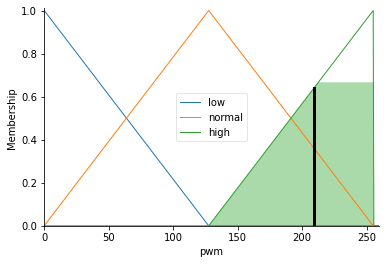

In [36]:
#sensor
left = ctrl.Antecedent(np.arange(0, 1.55, 0.005), 'left')
center = ctrl.Antecedent(np.arange(0, 1.55, 0.005), 'center')
right = ctrl.Antecedent(np.arange(0, 1.55, 0.005), 'right')
#combine
lc = ctrl.Consequent(np.arange(0, 91, 0.5), 'lc')
rc = ctrl.Consequent(np.arange(-90, 1, 0.5), 'rc')
#output
pwm = ctrl.Consequent(np.arange(0, 260, 0.5), 'pwm')

# range: 0 - 1.5
left['low'] = fuzz.trimf(left.universe, [0,0,0.75])
left['normal'] = fuzz.trimf(left.universe, [0,0.75,1.5])
left['high'] = fuzz.trimf(left.universe, [0.75,1.5,1.5])

#range: 0 - 1.5
center['low'] = fuzz.trimf(center.universe, [0,0,0.75])
center['normal'] = fuzz.trimf(center.universe, [0,0.75,1.5])
center['high'] = fuzz.trimf(center.universe, [0.75,1.5,1.5])

#range: 0 - 1.5
right['low'] = fuzz.trimf(right.universe, [0,0,0.75])
right['normal'] = fuzz.trimf(right.universe, [0,0.75,1.5])
right['high'] = fuzz.trimf(right.universe, [0.75,1.5,1.5])

#range: -90 - 0
rc['low'] = fuzz.trimf(rc.universe, [-90,-67.5,-45])
rc['normal'] = fuzz.trimf(rc.universe, [-67.5,-45,-22.5])
rc['high'] = fuzz.trimf(rc.universe, [-45,-22.5,0])

#range: 0 - 90
lc['low'] = fuzz.trimf(lc.universe, [0,22.5,45])
lc['normal'] = fuzz.trimf(lc.universe, [22.5,45,67.5])
lc['high'] = fuzz.trimf(lc.universe, [45,67.5,90])

#range: 0 - 90
pwm['low'] = fuzz.trimf(pwm.universe, [0,0,127.5])
pwm['normal'] = fuzz.trimf(pwm.universe, [0,127.5,255])
pwm['high'] = fuzz.trimf(pwm.universe, [127.5,255,255])

#rules for lc
rule1 = ctrl.Rule(left['low']&center['low']
                | left['low']&center['normal']
                | left['normal']&center['low']
                | left['low']&center['high']
                | left['high']&center['low'] ,lc['high'])

rule2 = ctrl.Rule(left['normal']&center['normal']
                | left['normal']&center['high']
                | left['high']&center['normal'] ,lc['normal'])

rule3 = ctrl.Rule(left['high']&center['high'] ,lc['low'])

#rules for rc
rule4 = ctrl.Rule(right['low']&center['low']
                | right['low']&center['normal']
                | right['normal']&center['low']
                | right['low']&center['high']
                | right['high']&center['low'] ,rc['high'])

rule5 = ctrl.Rule(right['normal']&center['normal']
                | right['normal']&center['high']
                | right['high']&center['normal'] ,rc['normal'])

rule6 = ctrl.Rule(right['high']&center['high'] ,rc['low'])

#rules for pwm
rule7 = ctrl.Rule(lc['high']&rc['high']
                | lc['high']&rc['normal']
                | lc['high']&rc['low']
                | lc['low']&rc['high']
                | lc['normal']&rc['high'] ,pwm['high'])

rule8 = ctrl.Rule(lc['normal']&rc['normal']
                | lc['normal']&rc['low']
                | lc['low']&rc['normal'] ,pwm['normal'])

rule9 = ctrl.Rule(lc['low']&rc['low'] ,pwm['low'])


pwm_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
pwming = ctrl.ControlSystemSimulation(pwm_ctrl)

pwming.input['left'] = 1.5
pwming.input['center'] = 1
pwming.input['right'] = 0
pwming.compute()

print(pwming.output['pwm'])
pwm.view(sim=pwming)

